In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import glob as glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
%config InlineBackend.figure_format='retina'

In [167]:
temp = np.loadtxt('Temperature_in_C.dat')
b1 = np.loadtxt('Reflectance_band_1.dat')
b2 = np.loadtxt('Reflectance_band_2.dat')
b3 = np.loadtxt('Reflectance_band_3.dat')
b4 = np.loadtxt('Reflectance_band_4.dat')
b5 = np.loadtxt('Reflectance_band_5.dat')
elev = np.loadtxt('Elevation_in_meters.dat')

elev = np.where(elev == -32767, np.nan, elev)
b1 = np.where(b1 == 1, np.nan, b1)
b2 = np.where(b2 == 1, np.nan, b2)
b3 = np.where(b3 == 1, np.nan, b3)
b4 = np.where(b4 == 1, np.nan, b4)
b5 = np.where(b5 == 1, np.nan, b5)
temp = np.where(temp == -32767, np.nan, temp)

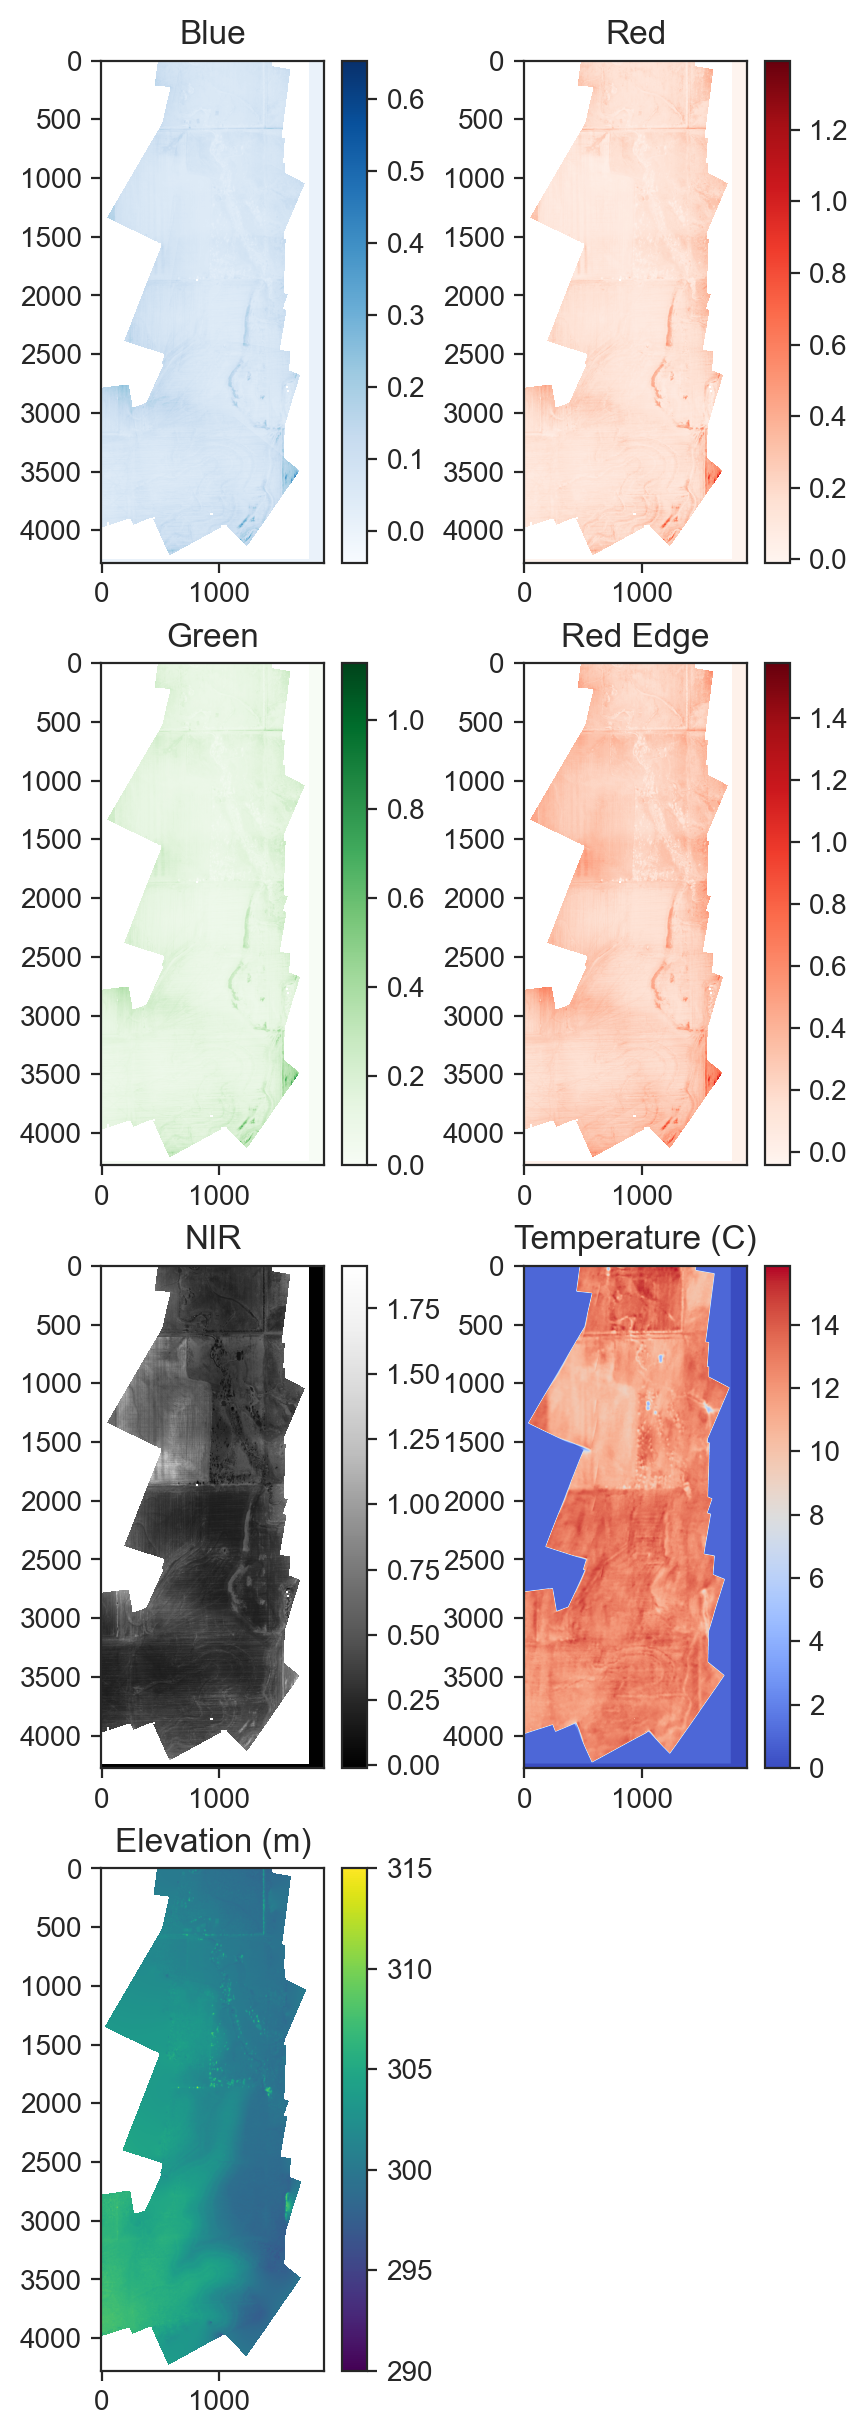

In [117]:
fig, ax = plt.subplots(4,2, figsize = (5,15))

im = ax[0,0].imshow(b1, cmap = 'Blues')
plt.colorbar(im)

im = ax[1,0].imshow(b2, cmap = 'Greens')
plt.colorbar(im)

im = ax[0,1].imshow(b3, cmap = 'Reds')
plt.colorbar(im)
\
im = ax[1,1].imshow(b4, cmap = 'Reds')
plt.colorbar(im)

im = ax[2,0].imshow(b5, cmap = 'Greys_r')
plt.colorbar(im)

im = ax[2,1].imshow(temp, cmap = 'coolwarm')
plt.colorbar(im)

im = ax[3,0].imshow(elev, cmap = 'viridis', vmin = 290, vmax = 315)
plt.colorbar(im)

# plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0,0].set_title('Blue')
ax[1,0].set_title('Green')
ax[0,1].set_title('Red')
ax[1,1].set_title('Red Edge')
ax[2,0].set_title('NIR')
ax[2,1].set_title('Temperature (C)')
ax[3,0].set_title('Elevation (m)')
fig.delaxes(ax[3,1])

/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_64021/2508777444.py:1: RuntimeWarning: invalid value encountered in divide
  ndvi = (b5 - b3) / (b5 + b3)


Text(0.5, 1.0, 'NDVI')

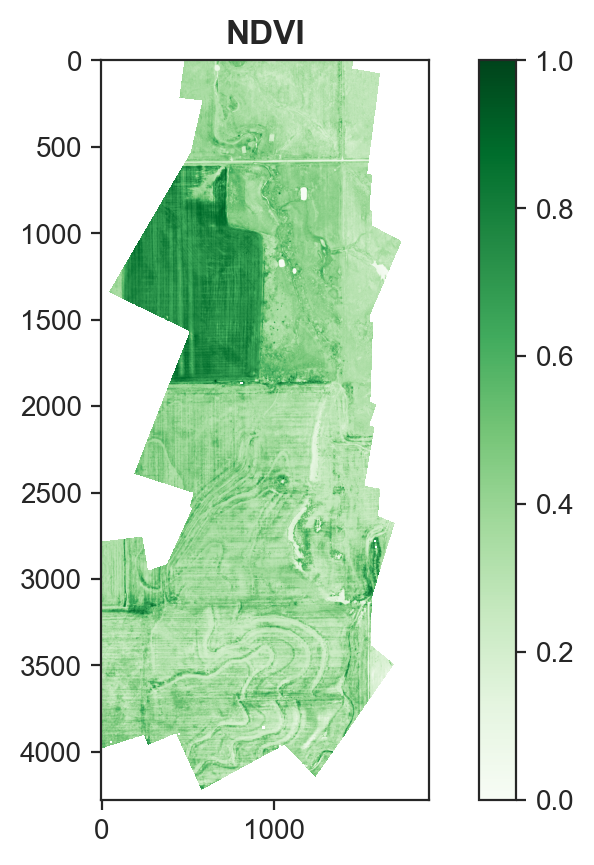

In [123]:
ndvi = (b5 - b3) / (b5 + b3)

fig, ax = plt.subplots()

im = ax.imshow(ndvi, cmap = 'Greens', vmin = 0, vmax = 1)
plt.colorbar(im)
ax.set_title('NDVI', weight = 'bold')

Text(0.5, 1.0, 'NIRv')

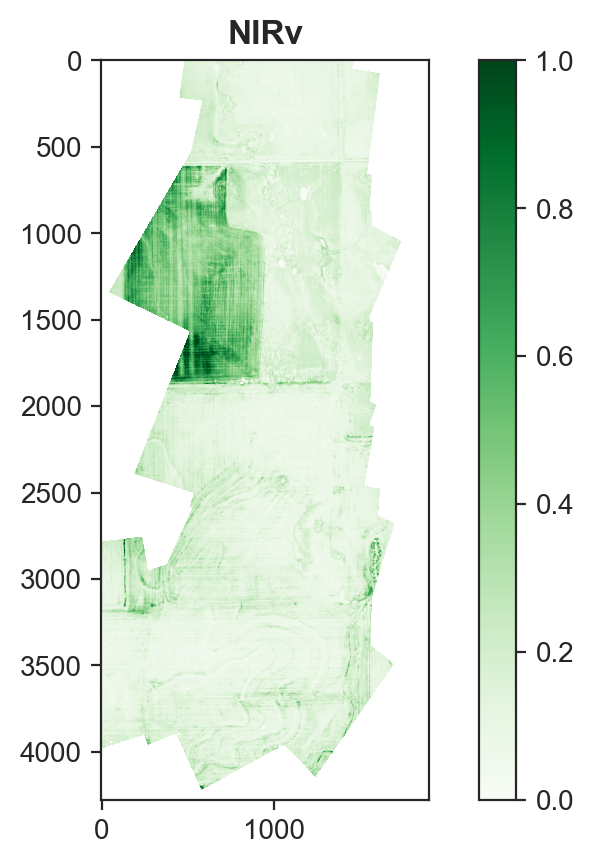

In [131]:
nirv = b5 * ndvi

fig, ax = plt.subplots()

im = ax.imshow(nirv, cmap = 'Greens', vmin = 0, vmax = 1)
plt.colorbar(im)
ax.set_title('NIRv', weight = 'bold')

/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_64021/2558374992.py:1: RuntimeWarning: invalid value encountered in divide
  ndwi = (b2 - b5) / (b2 + b5)


Text(0.5, 1.0, 'NDWI')

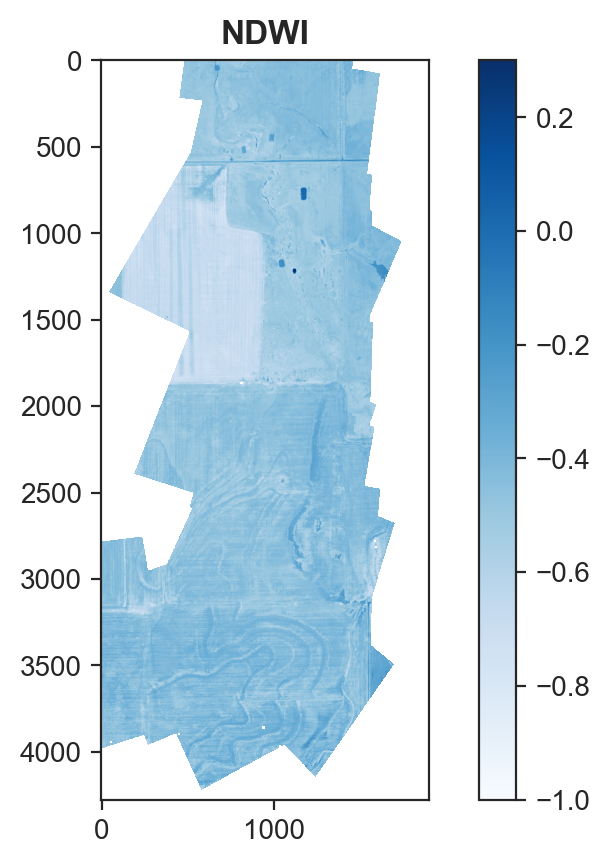

In [135]:
ndwi = (b2 - b5) / (b2 + b5)

fig, ax = plt.subplots()

im = ax.imshow(ndwi, cmap = 'Blues', vmin = -1, vmax = 0.3)
plt.colorbar(im)
ax.set_title('NDWI', weight = 'bold')

Text(0.5, 1.0, 'Histogram NDVI')

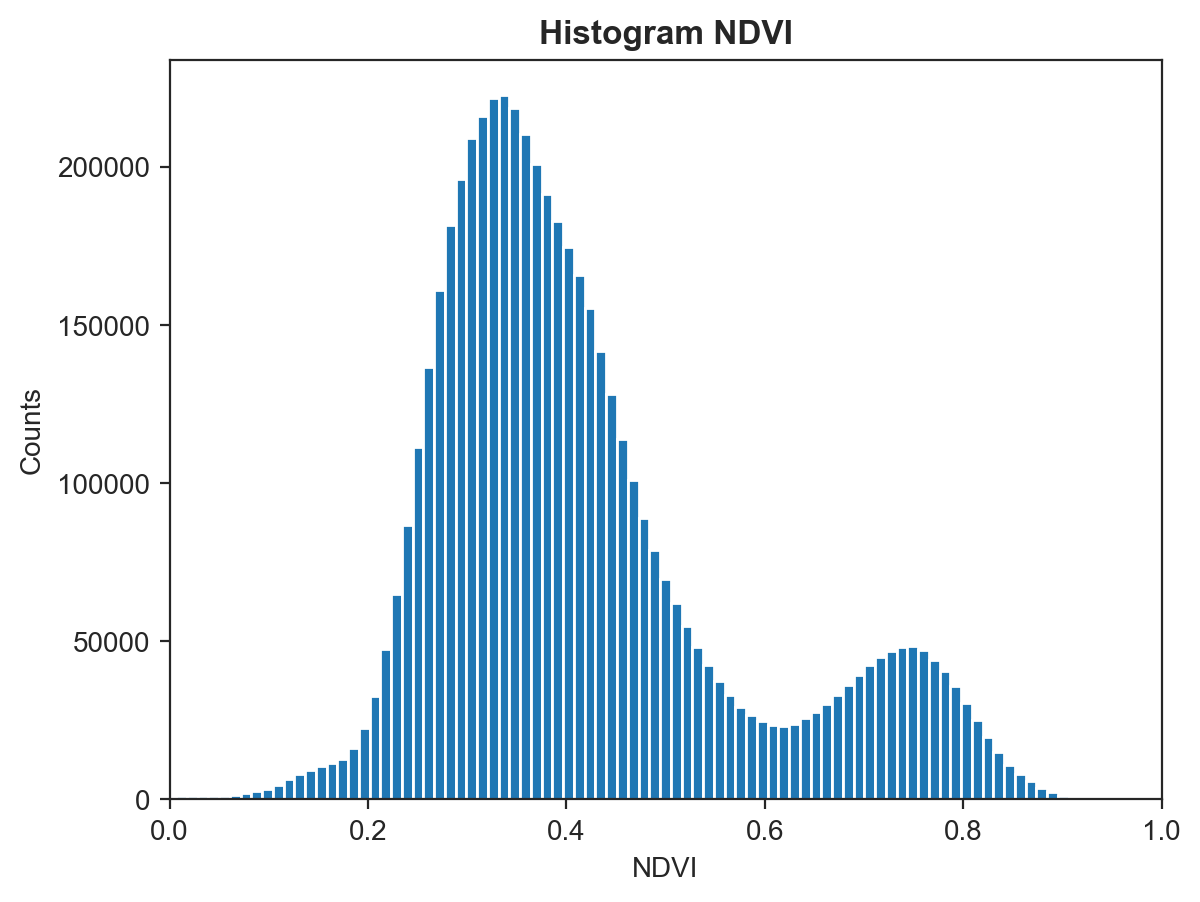

In [130]:
fig, ax = plt.subplots()

ax.hist(ndvi.flatten(), bins = 500);
ax.set_xlim([0,1])
ax.set_ylabel('Counts')
ax.set_xlabel('NDVI')
ax.set_title('Histogram: NDVI', weight = 'bold')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


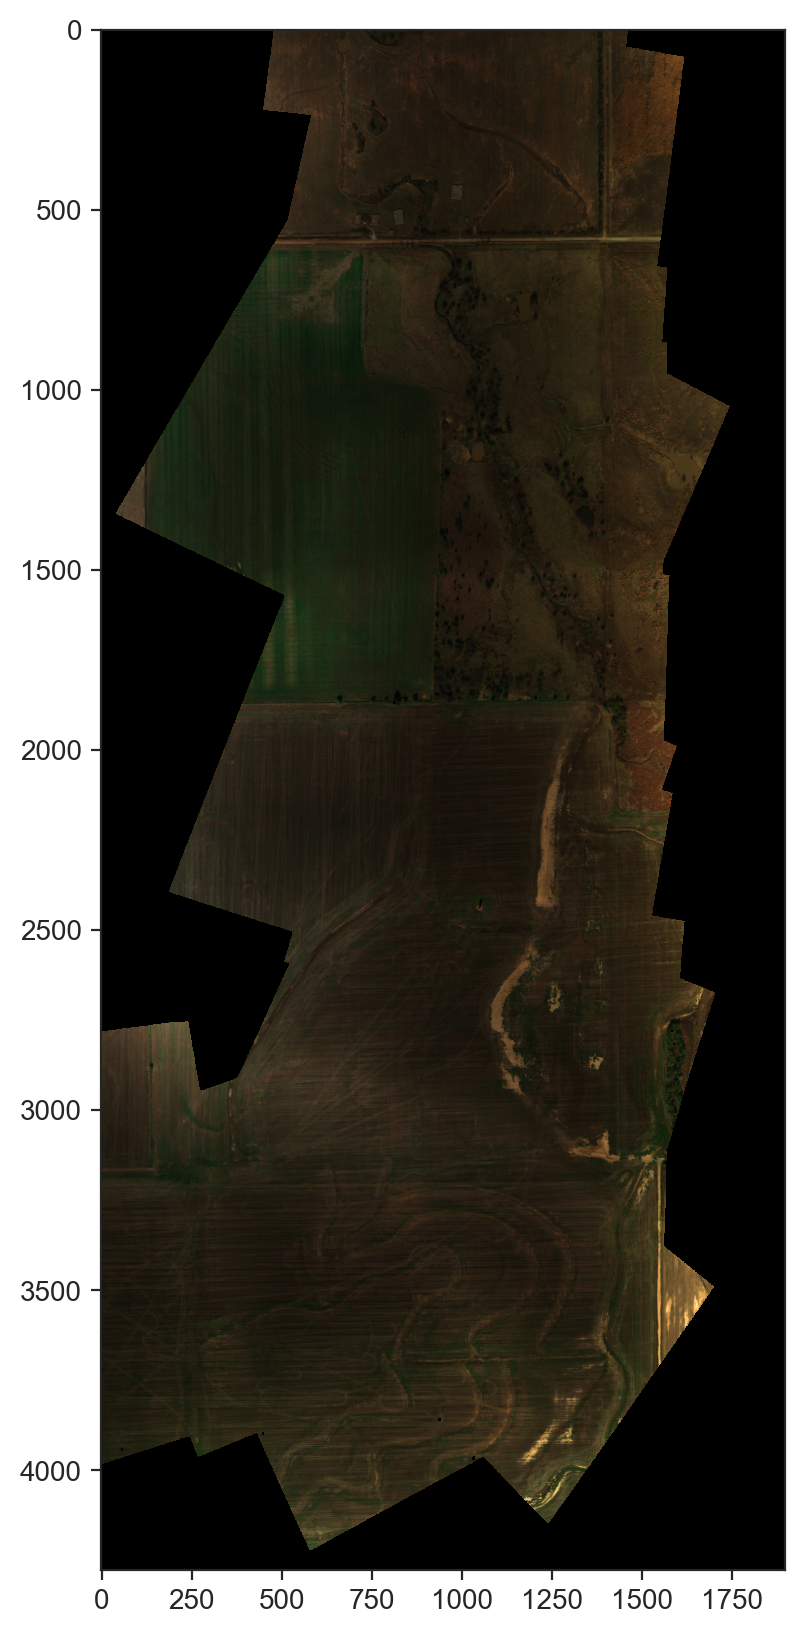

In [201]:
rgb = np.dstack((b3, b2, b1))
fig, ax = plt.subplots(figsize = (10, 10))

ax.imshow(rgb)

In [170]:
rgb = np.zeros(b1.shape[0] * b1.shape[1]);

for i, (b1_i, b2_i, b3_i) in enumerate(zip(b1, b2, b3)):
    rgb[i] = np.array([b1_i, b2_i, b3_i])

ValueError: setting an array element with a sequence.

AttributeError: AxesImage.set() got an unexpected keyword argument 'c'

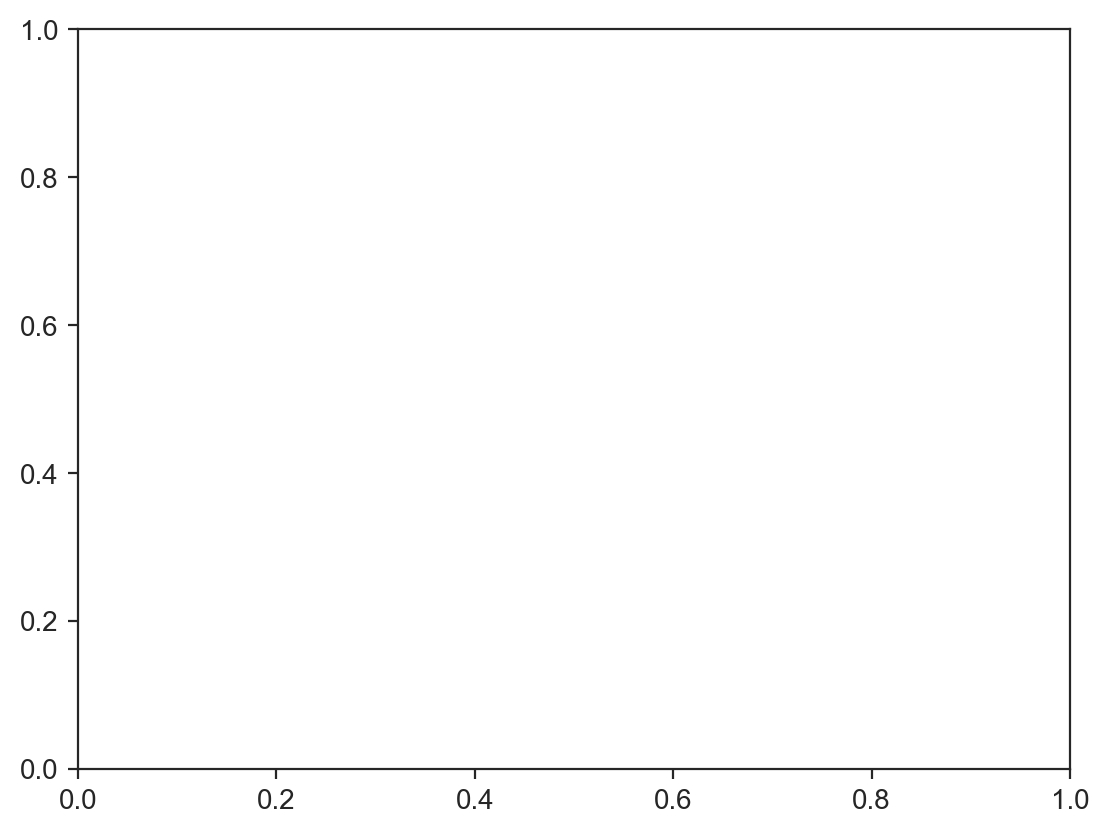

In [147]:
rgb = np.hstack([b1, b2, b3])

fig, ax = plt.subplots()

im = ax.imshow(rgb, c = rgb, vmin = 0, vmax = 1)
plt.colorbar(im)
ax.set_title('NIRv', weight = 'bold')